# Modeling Energy Efficiency of Buildings

### Data set credit

https://archive.ics.uci.edu/ml/datasets/Energy+efficiency#

A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012 

In [1]:
## import libraries

In [2]:
## Load and inspect data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("ENB2012_data.csv")

In [5]:
df.head()

,Compactness,SurfaceArea,WallArea,RoofArea,Height,Orientation,WindowsArea,WindowsDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Compactness          768 non-null    float64
 1   SurfaceArea          768 non-null    float64
 2   WallArea             768 non-null    float64
 3   RoofArea             768 non-null    float64
 4   Height               768 non-null    float64
 5   Orientation          768 non-null    int64  
 6   WindowsArea          768 non-null    float64
 7   WindowsDistribution  768 non-null    int64  
 8   HeatingLoad          768 non-null    float64
 9   CoolingLoad          768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
SurfaceArea,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
WallArea,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
RoofArea,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
WindowsArea,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
WindowsDistribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
HeatingLoad,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
CoolingLoad,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [8]:
df.isnull().sum()

Compactness            0
SurfaceArea            0
WallArea               0
RoofArea               0
Height                 0
Orientation            0
WindowsArea            0
WindowsDistribution    0
HeatingLoad            0
CoolingLoad            0
dtype: int64

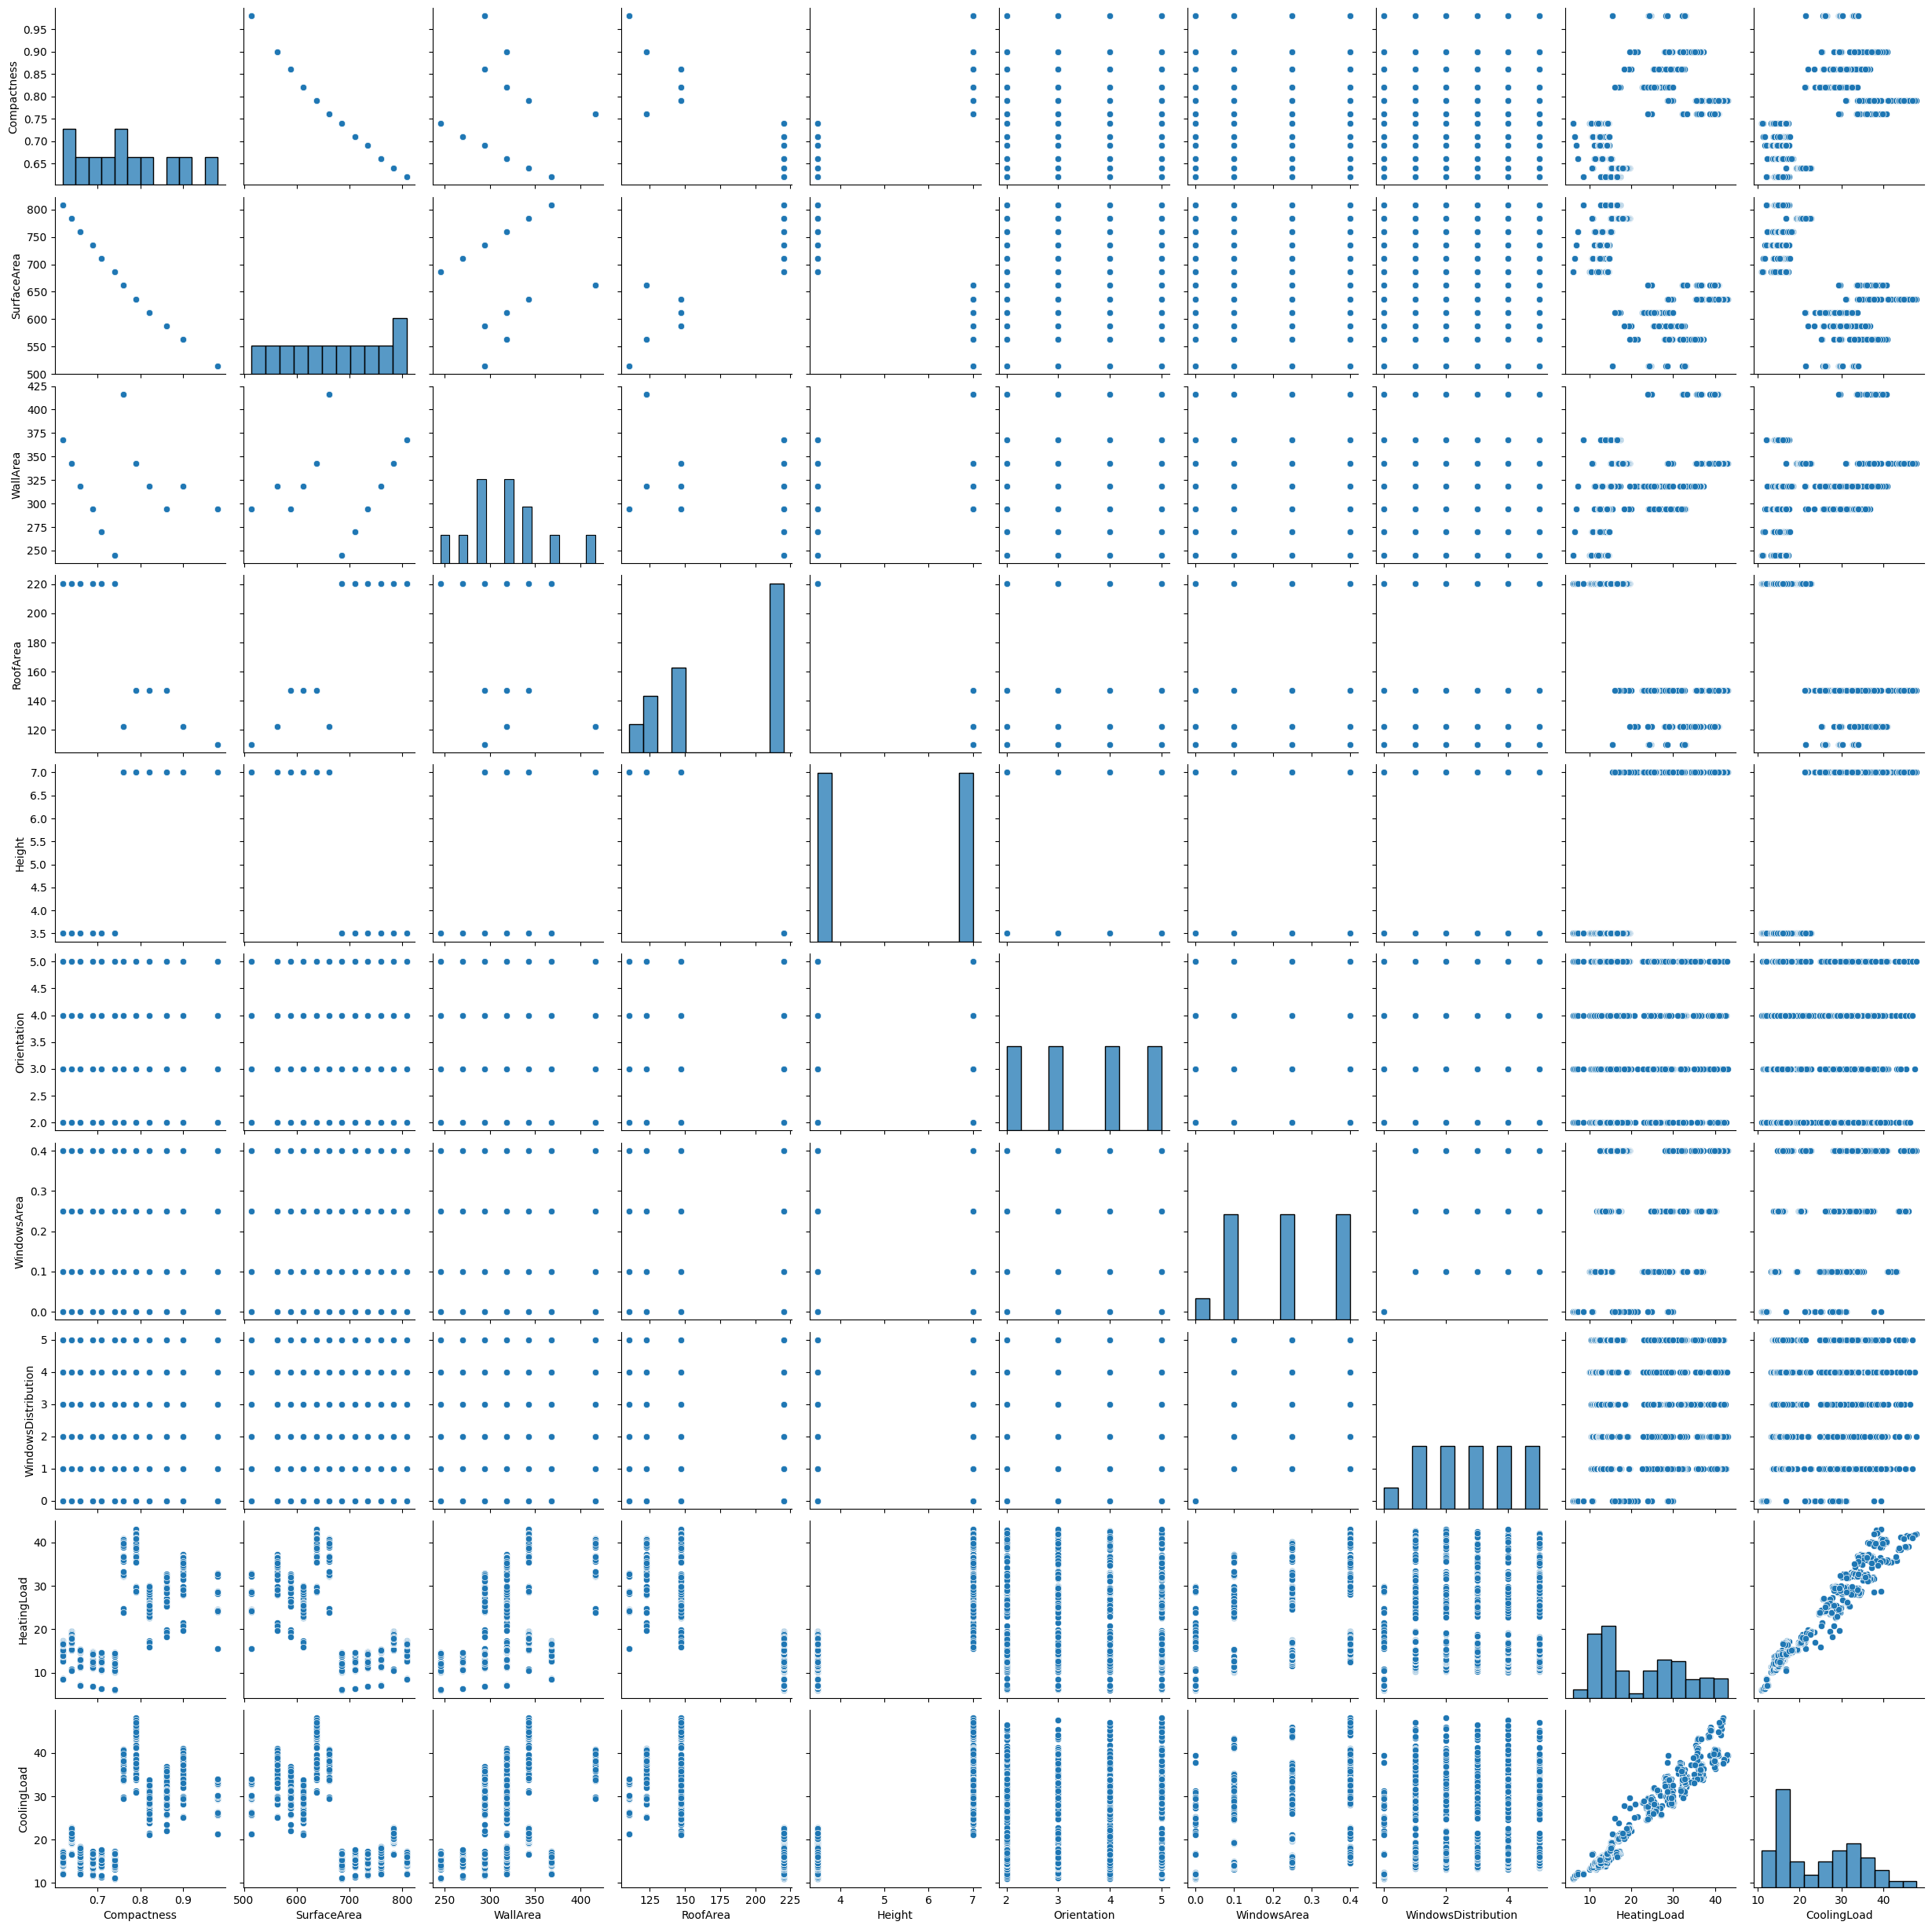

In [9]:
sns.pairplot(data =df)

<AxesSubplot:>

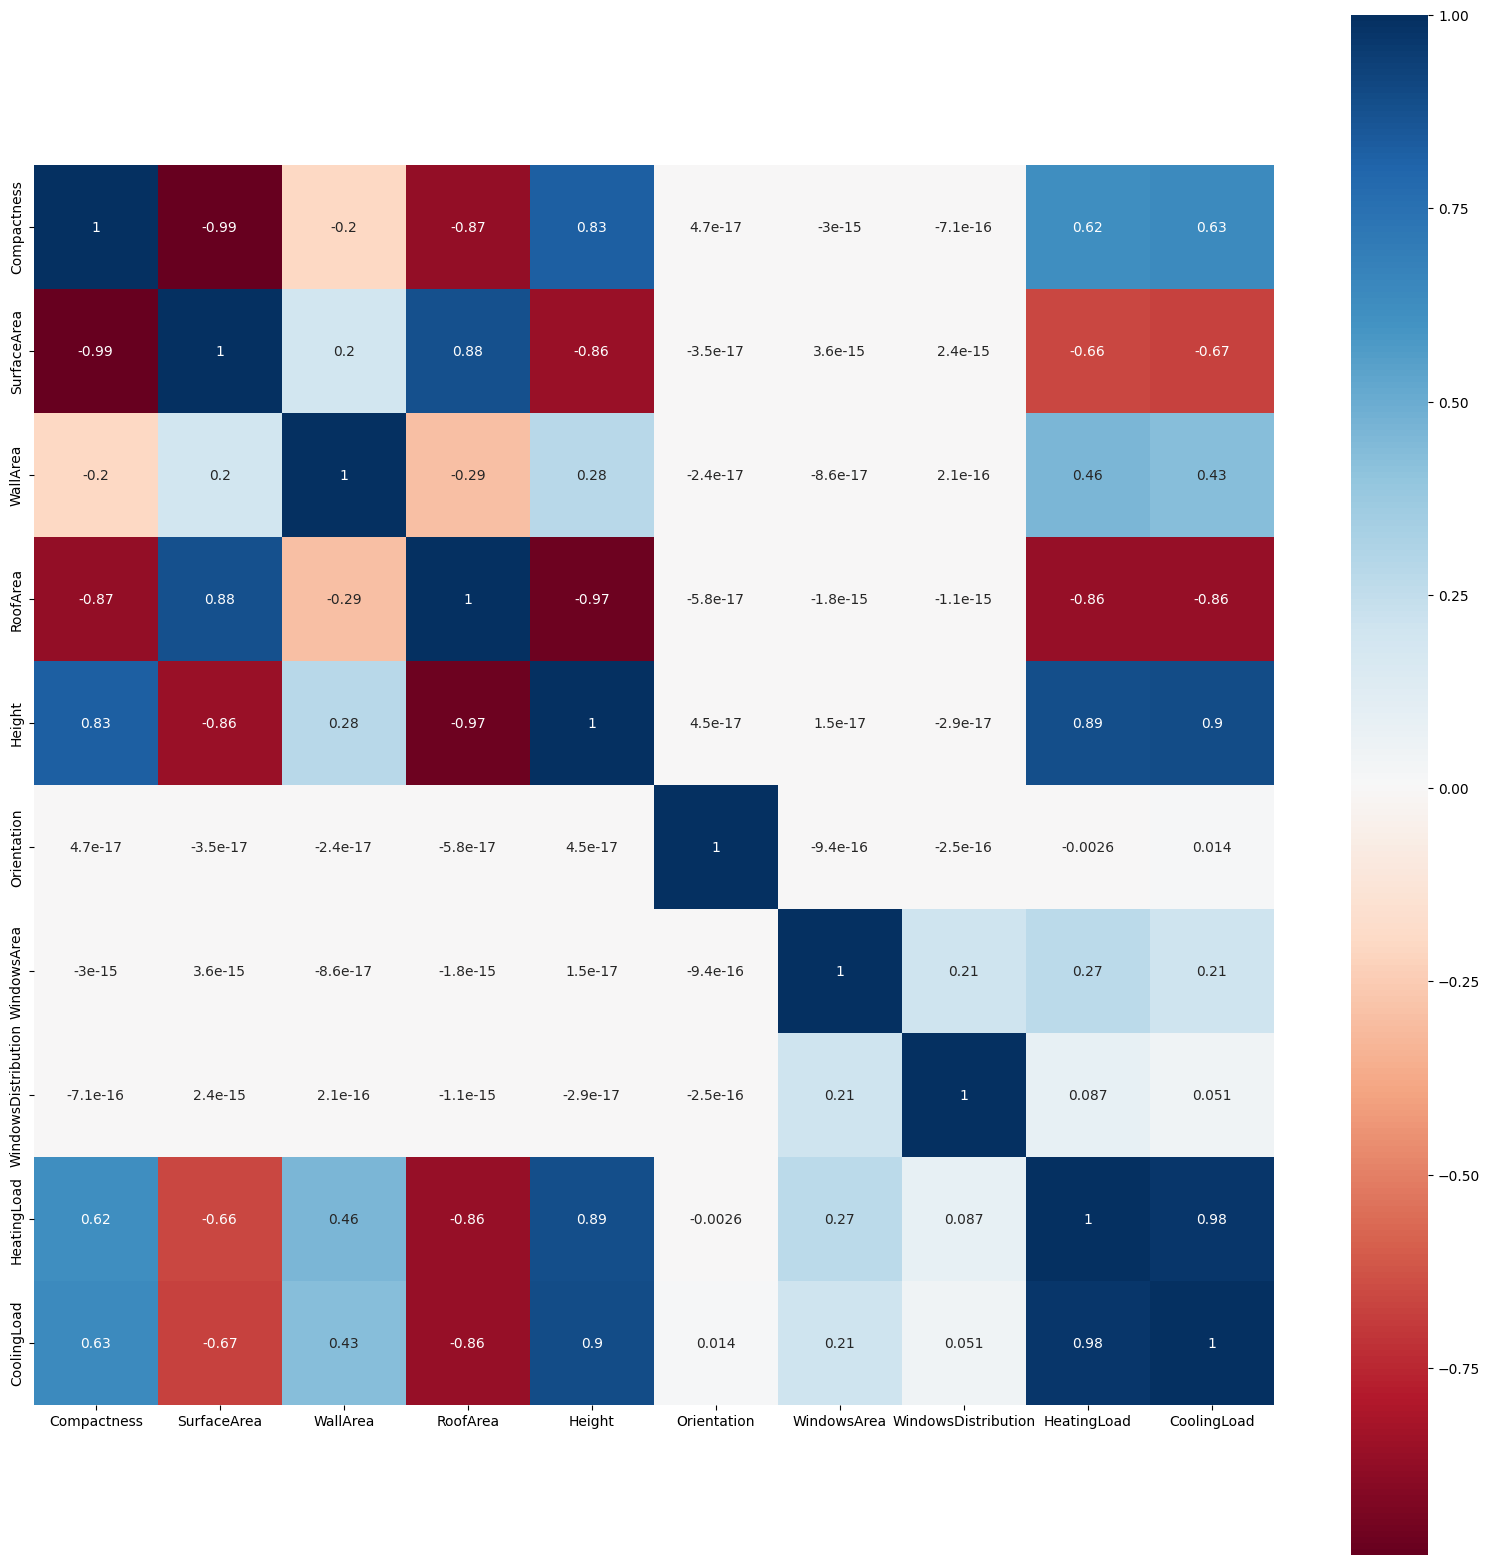

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(data =df.corr(), annot=True,square=True,cmap="RdBu", fmt='.2g')

In [11]:
## Combine heating and cooling load in a single data

In [12]:
df["combined_load"] = df["HeatingLoad"]+df["CoolingLoad"]

In [13]:
df = df.drop(["HeatingLoad","CoolingLoad"], axis =1)

In [14]:
## Encode categorical values

In [15]:
#The "Orientation" and "WindowsDistribution" columns are not numeric values; the integers in these columns represent categories. "Orientation" maps to North, South, East, and West, and "WindowsDistribution" maps to six  different layouts for positioning windows in a building. To make this data suitable for machine learning, these columns must be replaced with one-hot encoded representations, with individual binary columns for each possible value.

In [16]:
encoded = pd.get_dummies(df, columns=["Orientation", "WindowsDistribution"])

In [17]:
encoded

,Compactness,SurfaceArea,WallArea,RoofArea,Height,WindowsArea,combined_load,Orientation_2,Orientation_3,Orientation_4,Orientation_5,WindowsDistribution_0,WindowsDistribution_1,WindowsDistribution_2,WindowsDistribution_3,WindowsDistribution_4,WindowsDistribution_5
0,0.98,514.5,294.0,110.25,7.0,0.0,36.88,1,0,0,0,1,0,0,0,0,0
1,0.98,514.5,294.0,110.25,7.0,0.0,36.88,0,1,0,0,1,0,0,0,0,0
2,0.98,514.5,294.0,110.25,7.0,0.0,36.88,0,0,1,0,1,0,0,0,0,0
3,0.98,514.5,294.0,110.25,7.0,0.0,36.88,0,0,0,1,1,0,0,0,0,0
4,0.90,563.5,318.5,122.50,7.0,0.0,49.12,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,39.28,0,0,0,1,0,0,0,0,0,1
764,0.62,808.5,367.5,220.50,3.5,0.4,33.42,1,0,0,0,0,0,0,0,0,1
765,0.62,808.5,367.5,220.50,3.5,0.4,33.55,0,1,0,0,0,0,0,0,0,1
766,0.62,808.5,367.5,220.50,3.5,0.4,33.09,0,0,1,0,0,0,0,0,0,1


In [18]:
#Split the data in X and y

In [19]:
X = encoded.drop("combined_load",axis=1)

In [20]:
X

,Compactness,SurfaceArea,WallArea,RoofArea,Height,WindowsArea,Orientation_2,Orientation_3,Orientation_4,Orientation_5,WindowsDistribution_0,WindowsDistribution_1,WindowsDistribution_2,WindowsDistribution_3,WindowsDistribution_4,WindowsDistribution_5
0,0.98,514.5,294.0,110.25,7.0,0.0,1,0,0,0,1,0,0,0,0,0
1,0.98,514.5,294.0,110.25,7.0,0.0,0,1,0,0,1,0,0,0,0,0
2,0.98,514.5,294.0,110.25,7.0,0.0,0,0,1,0,1,0,0,0,0,0
3,0.98,514.5,294.0,110.25,7.0,0.0,0,0,0,1,1,0,0,0,0,0
4,0.90,563.5,318.5,122.50,7.0,0.0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,0,0,0,1,0,0,0,0,0,1
764,0.62,808.5,367.5,220.50,3.5,0.4,1,0,0,0,0,0,0,0,0,1
765,0.62,808.5,367.5,220.50,3.5,0.4,0,1,0,0,0,0,0,0,0,1
766,0.62,808.5,367.5,220.50,3.5,0.4,0,0,1,0,0,0,0,0,0,1


In [21]:
y = encoded[["combined_load"]]

In [22]:
y

,combined_load
0,36.88
1,36.88
2,36.88
3,36.88
4,49.12
...,...
763,39.28
764,33.42
765,33.55
766,33.09


In [23]:
##Normalize the features

array([[<AxesSubplot:title={'center':'Compactness'}>,
        <AxesSubplot:title={'center':'SurfaceArea'}>],
       [<AxesSubplot:title={'center':'WallArea'}>,
        <AxesSubplot:title={'center':'RoofArea'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'WindowsArea'}>]], dtype=object)

<Figure size 1500x1500 with 0 Axes>

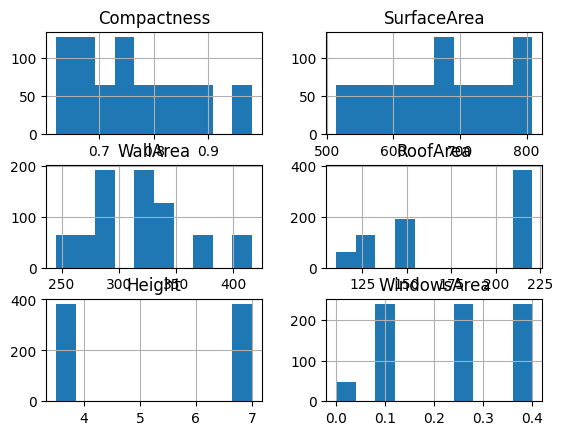

In [25]:
plt.figure(figsize=(15,15))

X.hist(column=['Compactness', 'SurfaceArea', 'WallArea', 'RoofArea', 'Height', 'WindowsArea'])

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
sc = MinMaxScaler()

In [40]:
X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [41]:
X_scaled

,Compactness,SurfaceArea,WallArea,RoofArea,Height,WindowsArea,Orientation_2,Orientation_3,Orientation_4,Orientation_5,WindowsDistribution_0,WindowsDistribution_1,WindowsDistribution_2,WindowsDistribution_3,WindowsDistribution_4,WindowsDistribution_5
0,1.000000,0.000000,0.285714,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
764,0.000000,1.000000,0.714286,1.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
765,0.000000,1.000000,0.714286,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
766,0.000000,1.000000,0.714286,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
#Split in Train Test

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=1234)

In [48]:
# Train and Evaluate on linear Regression model

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

In [72]:
y_train_predict = model.predict(X_train)

In [73]:
y_test_predict = model.predict(X_test)

In [74]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [75]:
train_r2 = r2_score(y_train,y_train_predict)

In [76]:
train_r2 

0.9136381079604162

In [77]:
train_mae = mean_absolute_error(y_train,y_train_predict)

In [78]:
train_mae

4.112715798045602

In [79]:
train_mse = mean_squared_error(y_train,y_train_predict)

In [80]:
train_mse

32.56616215645357

In [81]:
y_test_predict = model.predict(X_test)

In [82]:
test_r2 = r2_score(y_test,y_test_predict)

In [83]:
test_r2

0.9244686750368682

In [84]:
test_mae = mean_absolute_error(y_test,y_test_predict)

In [85]:
test_mae

3.8562053571428567

In [86]:
test_mse = mean_squared_error(y_test,y_test_predict)

In [87]:
test_mse 

28.863680978591717

In [88]:
test_rmse = test_mse**0.5

In [89]:
test_rmse

5.372492994745709

In [90]:
# Train and Evaluate on Decision Tree model


In [91]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
dt = DecisionTreeRegressor(random_state=1234)

In [98]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1234)

In [101]:
y_train_predict = dt.predict(X_train)

In [102]:
y_test_predict = dt.predict(X_test)

In [103]:
train_r2 = r2_score(y_train,y_train_predict)

In [104]:
train_r2

1.0

In [105]:
train_mae = mean_absolute_error(y_train,y_train_predict)

In [106]:
train_mae

0.0

In [107]:
train_mse = mean_squared_error(y_train,y_train_predict)

In [108]:
train_mse

0.0

In [109]:
test_r2 = r2_score(y_test,y_test_predict)

In [110]:
test_r2

0.9884225662096097

In [111]:
test_mae = mean_absolute_error(y_test,y_test_predict)

In [112]:
test_mae

1.2259740259740257

In [113]:
test_mse = mean_squared_error(y_test,y_test_predict)

In [114]:
test_mse

4.424222077922075

In [115]:
test_rmse = test_mse**0.5

In [116]:
test_rmse

2.103383483324445

In [117]:
# Train and Evaluate on Random forest model

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
rf = RandomForestRegressor(random_state=1234)


In [120]:
rf.fit(X_train,y_train)


/home/labsuser/.tmp/ipykernel_2880/4185311803.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor(random_state=1234)

In [122]:
y_train_predict = rf.predict(X_train)

In [123]:
y_test_predict = rf.predict(X_test)

In [124]:
train_r2 = r2_score(y_train,y_train_predict)

In [125]:
train_r2

0.9986997706873885

In [126]:
test_r2 = r2_score(y_test,y_test_predict)

In [127]:
test_r2

0.9926080773308051

In [128]:
train_mae = mean_absolute_error(y_train,y_train_predict)

In [129]:
train_mae

0.42325716612378234

In [130]:
train_mse = mean_squared_error(y_train,y_train_predict)

In [131]:
train_mse

0.4903028133713415

In [132]:
test_r2 = r2_score(y_test,y_test_predict)

In [133]:
test_r2

0.9926080773308051

In [134]:
test_mae = mean_absolute_error(y_test,y_test_predict)

In [135]:
test_mae

1.1010512987012984

In [136]:
test_mse = mean_squared_error(y_test,y_test_predict)

In [137]:
test_mse

2.82476307474025

In [138]:
test_rmse = test_mse**0.5

In [139]:
test_rmse

1.6807031489053175

In [140]:
## Perform hyper paramter tuning


In [141]:
from sklearn.model_selection import GridSearchCV
 
grid = {
    'n_estimators': [10, 100, 200, 500],
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'random_state' : [1234]
}
 
forest_cv = GridSearchCV(estimator = RandomForestRegressor(),
                         param_grid=grid,
                         cv=5)
 
forest_cv.fit(X_train, y_train)

/home/labsuser/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/labsuser/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/labsuser/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/labsuser/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionW

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'n_estimators': [10, 100, 200, 500],
                         'random_state': [1234]})

In [142]:
forest_cv.best_params_

{'criterion': 'absolute_error', 'n_estimators': 500, 'random_state': 1234}

In [143]:
forest_model = RandomForestRegressor(n_estimators=500, criterion='absolute_error')
forest_model.fit(X_train, y_train)
 
test_mse = mean_squared_error(y_test, forest_model.predict(X_test))
test_mae = mean_absolute_error(y_test, forest_model.predict(X_test))
test_rmse = test_mse ** 0.5
 
print("Testing mse = ", test_mse, " mae = ", test_mae, " rmse = ", test_rmse)

/home/labsuser/.tmp/ipykernel_2880/159000990.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


Testing mse =  2.653606517599371  mae =  1.0962009740259853  rmse =  1.6289894160489107
